In [1]:
# default parameters (controlled by papermill in automatic runs)
sample_orders=100
run='classic'
target='manual'
titles = [
    'Hot Shots! (1991)',
    'Star Trek: Generations (1994)', 
#     'Star Trek III: The Search for Spock (1984)', 

#     'Star Trek (2009)', 
#     'Star Trek: First Contact (1996)', 
#     'Star Trek II: The Wrath of Khan (1982)', 'Star Trek IV: The Voyage Home (1986)', 
#     'Star Trek Into Darkness (2013)', 'Star Trek VI: The Undiscovered Country (1991)', 
#     'Star Trek: The Motion Picture (1979)', 
#     'Star Trek: Insurrection (1998)', 'Star Trek V: The Final Frontier (1989)', 
#     'Star Trek Beyond (2016)', 'Star Trek: Nemesis (2002)', 'Star Trek: Renegades (2015)', 
#     'Star Trek: Of Gods and Men (2007)'
]

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../") 
sys.path.append("../es/") 


import random
myseed = 13
random.seed(myseed)

import pandas as pd
import numpy as np
import es
import es.runner.scenario_runner
from es.data.movielens_data import MovielensData
from es.runner.view_models import show_cube_grid, RankSquareViewModel, SpectrumViewModel
import es.elections
import es.utils
import es.scorers
from es import *

import bokeh
import bokeh.plotting
from bokeh.io import output_notebook
output_notebook()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import es.sql_database

pd.set_option('display.max_rows', 40)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


Loading BokehJS ...

# Loading election data

In [3]:
%%time
idata = MovielensData(es.data_config.data_movielens_25m)
iframes = es.elections.InstacartDataFrames.from_data(idata)    
iframes.sample(n_orders=sample_orders, random_state=13, inplace=True)
global_election_utils = es.electionutils.ElectionUtils(iframes)
db = sql_database.Database()
db.load_frames(iframes)

reading instacart data
reading DataFrame order_products__all from parquet: /Users/gregaw/code/ddr/esearch/es/../in/movielens_25m/order_products__all.parquet
order_products__all contains 15630129 items
WARN: Only products with min_popularity=20 considered (137378 approvals filtered from 15630129 to 15492751)
reading DataFrame orders from parquet: /Users/gregaw/code/ddr/esearch/es/../in/movielens_25m/orders.parquet
orders contains 162414 items
reading DataFrame products from parquet: /Users/gregaw/code/ddr/esearch/es/../in/movielens_25m/products.parquet
products contains 62423 items
reading DataFrame departments from parquet: /Users/gregaw/code/ddr/esearch/es/../in/movielens_25m/departments.parquet
departments contains 1 items
reading DataFrame aisles from parquet: /Users/gregaw/code/ddr/esearch/es/../in/movielens_25m/aisles.parquet
aisles contains 1 items
WARN: limited the frame by sampling 100 random orders to: 100 orders, 3392 products (and 9648 order-product tuples)
Loading dfs to sq

In [4]:
titles = [t.replace('(', '.').replace(')', '.') for t in titles]

prefix=['', 'sa.']

def get_params():
    k = 10
    return es.utils.dotdict(dict(
        exp_name='tmp',
        k=k,
        searchterms=titles,
        filtering=dict(
            sample_orders=sample_orders), # eg 10000 or len(iframes.df_orders),
        rules = [f'{p}HUV_{i}' for i in range(0,4) for p in prefix], # prefix sa. means - use simulated annealing
        anneal_settings= {'tmax': 9900.0, 'tmin': 0.6, 'steps': 2000, 'updates': 10}, # comment out to auto-set, takes longer
        scorer_metrics=[
            'tfidfto2',
#             'bm25'
        ],
        scorer_funcs = [
            es.scorers.AgentSpreadScoringStrategy.from_found_df_sorted_nosearchterm,
        ]
    ))

PARAMS=get_params()
locals().update(PARAMS)
PARAMS=get_params()
locals().update(PARAMS)

import os
out_folder=f'../out/{target}/movielens-satisfaction/{run}'
if not os.path.exists(out_folder):
    os.makedirs(out_folder)


In [5]:
%%time
runner = es.runner.scenario_runner.ScenarioRunner(iframes, PARAMS)
results_df = runner.run(return_df=True, verbose=1)
results_df

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining


WARN: limited the frame by sampling 100 random orders to: 100 orders, 3392 products (and 9648 order-product tuples)
loaded 3392 products and 100 orders, (9648 ops)
2022-03-23 14:23:18.896419
Error while processing Hot Shots! .1991.: (<class 'Exception'>, Exception("Couldn't find search term: Hot Shots! .1991."), <traceback object at 0x7ff1c0949280>)
Traceback (most recent call last):
  File "/Users/gregaw/code/ddr/esearch/es/runner/scenario_runner.py", line 99, in run
    raise Exception(f"Couldn't find search term: {search_term}")
Exception: Couldn't find search term: Hot Shots! .1991.

dl=303, avgdl=2.8443396226415096, products=304 metrics_voter_count=100, real_voter_count=100
searching for: Star Trek: Generations .1994. : ['Star Trek: Generations (1994)']
----------
RUN: exp_name=tmp;ut_scorer=None
filtered iframes, products: 303, orders:  4
processing RULE: HUV_0
Using algo/version: g/4
Using optimised HUV_0
greedy score=28.0 ([4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0])
pro

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining


annealing done @ 14:23:18
annealing score=8.376190476190475
processing RULE: HUV_2
Using algo/version: g/4
added member #0: 42, total committee score 4.000, added member delta: 4.000
added member #1: 20, total committee score 4.750, added member delta: 0.750
added member #2: 8, total committee score 5.111, added member delta: 0.361
added member #3: 38, total committee score 5.396, added member delta: 0.285
added member #4: 95, total committee score 5.569, added member delta: 0.174
added member #5: 51, total committee score 5.712, added member delta: 0.142
added member #6: 67, total committee score 5.807, added member delta: 0.096
added member #7: 15, total committee score 5.890, added member delta: 0.083
added member #8: 71, total committee score 5.954, added member delta: 0.064
added member #9: 103, total committee score 6.010, added member delta: 0.056
greedy score=6.009844079613686
processing RULE: sa.HUV_2
Using algo/version: sa/2
first state= [17, 73, 89, 103, 110, 163, 173, 235, 

rank                                       HUV_0  HUV_0_id  \
0     1                             Stargate (1994)       316   
1     2           Terminator 2: Judgment Day (1991)       589   
2     3                        Jurassic Park (1993)       480   
3     4                            Firm, The (1993)       454   
4     5                         Forrest Gump (1994)       356   
5     6                             Outbreak (1995)       292   
6     7                           Braveheart (1995)       110   
7     8                              Michael (1996)      1409   
8     9        Star Trek IV: The Voyage Home (1986)      1376   
9    10  Star Trek III: The Search for Spock (1984)      1375   

                                            sa.HUV_0  sa.HUV_0_id  \
0                                   Desperado (1995)          163   
1                                 French Kiss (1995)          236   
2                                    Stargate (1994)          316   
3  Tales from the Crypt Presents: Demon Knight (1...          328   
4                               Jurassic Park (1993)          480   
5                        Beauty and the Beast (1991)          595   
6                                 Dragonheart (1996)          653   
7               Robin Hood: Prince of Thieves (1991)         1027   
8                         Alice in Wonderland (1951)         1032   
9                   Last of the Mohicans, The (1992)         1408   

                                       HUV_1  HUV_1_id  \
0                            Stargate (1994)       316   
1                          Braveheart (1995)       110   
2                            Outbreak (1995)       292   
3  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)        32   
4                        Forrest Gump (1994)       356   
5                           Firm, The (1993)       454   
6                         Dragonheart (1996)       653   
7                       Jurassic Park (1993)       480   
8          Terminator 2: Judgment Day (1991)       589   
9                  Mr. Holland's Opus (1995)        62   

                                            sa.HUV_1  sa.HUV_1_id  \
0                                    Stargate (1994)          316   
1                          Dances with Wolves (1990)          590   
2                         Mission: Impossible (1996)          648   
3                                 Dragonheart (1996)          653   
4               Independence Day (a.k.a. ID4) (1996)          780   
5                           Last Man Standing (1996)          996   
6  Star Wars: Episode V - The Empire Strikes Back...         1196   
7                                      Aliens (1986)         1200   
8                                     Michael (1996)         1409   
9                                  Awakenings (1990)         3105   

                                       HUV_2  HUV_2_id  \
0                            Stargate (1994)       316   
1                          Braveheart (1995)       110   
2  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)        32   
3                            Outbreak (1995)       292   
4                         Dragonheart (1996)       653   
5                        Forrest Gump (1994)       356   
6                           Firm, The (1993)       454   
7                  Mr. Holland's Opus (1995)        62   
8                       Jurassic Park (1993)       480   
9       Independence Day (a.k.a. ID4) (1996)       780   

                                         sa.HUV_2  sa.HUV_2_id  \
0                                GoldenEye (1995)           10   
1       Twelve Monkeys (a.k.a. 12 Monkeys) (1995)           32   
2                                 Stargate (1994)          316   
3                                    Ghost (1990)          587   
4                               Phenomenon (1996)          802   
5  Midnight in the Garden of Good and Evil (1997)         1711   
6                          

product_id  order_count_found  \
46          329                  4   
79          517                  2   
38          292                  3   
111         808                  1   
275        3175                  1   
285        3483                  1   
48          340                  1   
200        1799                  1   
45          328                  1   
274        3159                  1   

                                          product_name  order_count  tf  \
46                       Star Trek: Generations (1994)            4   4   
79                                   Rising Sun (1993)            2   2   
38                                     Outbreak (1995)            4   3   
111                                      Alaska (1996)            1   1   
275                                Galaxy Quest (1999)            1   1   
285                      Road to El Dorado, The (2000)            1   1   
48                                     War, The (1994)            1   1   
200                               Suicide Kings (1997)            1   1   
45   Tales from the Crypt Presents: Demon Knight (1...            1   1   
274                               Fantasia 2000 (1999)            1   1   

          idf     idfto2      tfidf   tfidfto2      bm25  ratioIn  
46   3.218876   9.310611  12.875503  37.242443  0.197125     1.00  
79   3.912023  15.053458   7.824046  30.106916  0.121022     1.00  
38   3.218876   9.310611   9.656627  27.931833  0.148602     0.75  
111  4.605170  24.338531   4.605170  24.338531  0.071602     1.00  
275  4.605170  24.338531   4.605170  24.338531  0.071602     1.00  
285  4.605170  24.338531   4.605170  24.338531  0.071602     1.00  
48   4.605170  24.338531   4.605170  24.338531  0.071602     1.00  
200  4.605170  24.338531   4.605170  24.338531  0.071602     1.00  
45   4.605170  24.338531   4.605170  24.338531  0.071602     1.00  
274  4.605170  24.338531   4.605170  24.338531  0.071602     1.00

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining


----------
RUN: exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)
filtered iframes, products: 303, orders:  4
processing RULE: HUV_0
Using algo/version: g/4
Using optimised HUV_0
greedy score=252.7469957211953 ([30.10691552593391, 27.93183258347566, 24.338530951473214, 24.338530951473214, 24.338530951473214, 24.338530951473214, 24.338530951473214, 24.338530951473214, 24.338530951473214, 24.338530951473214])
processing RULE: sa.HUV_0
Using algo/version: sa/2
first state= [2, 11, 16, 127, 131, 138, 211, 234, 283, 297]
annealing with: {'tmax': 9900.0, 'tmin': 0.6, 'steps': 2000, 'updates': 10}@ 14:23:19
annealing done @ 14:23:19
annealing score=252.7469957211954
processing RULE: HUV_1
Using algo/version: g/4
added member #0: 78, total committee score 30.107, added member delta: 30.107
added member #1: 47, total committee score 54.445, added member delta: 24.339
added member #2: 38, total committee score 73.067, added member delta: 18.621
added member #3: 5, total committee score 88.327, added 

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining


annealing done @ 14:23:19
annealing score=146.2337240145878
processing RULE: HUV_2
Using algo/version: g/4
added member #0: 78, total committee score 30.107, added member delta: 30.107
added member #1: 47, total committee score 54.445, added member delta: 24.339
added member #2: 28, total committee score 69.499, added member delta: 15.053
added member #3: 5, total committee score 82.547, added member delta: 13.048
added member #4: 17, total committee score 95.596, added member delta: 13.048
added member #5: 76, total committee score 101.680, added member delta: 6.085
added member #6: 38, total committee score 106.077, added member delta: 4.397
added member #7: 26, total committee score 109.618, added member delta: 3.541
added member #8: 40, total committee score 113.160, added member delta: 3.541
added member #9: 98, total committee score 115.864, added member delta: 2.704
greedy score=115.8639268875122
processing RULE: sa.HUV_2
Using algo/version: sa/2
first state= [7, 24, 31, 51, 103

rank                                           HUV_0  HUV_0_id  \
0     1                               Rising Sun (1993)       517   
1     2                                 Outbreak (1995)       292   
2     3  Naked Gun 2 1/2: The Smell of Fear, The (1991)      3869   
3     4                              Air America (1990)      3841   
4     5                   Road to El Dorado, The (2000)      3483   
5     6                           Jacob's Ladder (1990)      3476   
6     7                          Heart and Souls (1993)      3466   
7     8                What Planet Are You From? (2000)      3326   
8     9                 Buffy the Vampire Slayer (1992)      3264   
9    10                        Death Becomes Her (1992)      3258   

                                sa.HUV_0  sa.HUV_0_id  \
0             Scarlet Letter, The (1995)          191   
1                        Outbreak (1995)          292   
2                      Wyatt Earp (1994)          383   
3                      Rising Sun (1993)          517   
4  Day the Earth Stood Still, The (1951)         1253   
5                Marked for Death (1990)         1382   
6                        In & Out (1997)         1614   
7                  Dead Zone, The (1983)         2118   
8                      Jawbreaker (1999)         2500   
9               13th Warrior, The (1999)         2826   

                                HUV_1  HUV_1_id  \
0                   Rising Sun (1993)       517   
1                     War, The (1994)       340   
2                     Outbreak (1995)       292   
3  Dracula: Dead and Loving It (1995)        12   
4                 Nick of Time (1995)        89   
5                        North (1994)       505   
6                   Waterworld (1995)       208   
7          Scarlet Letter, The (1995)       191   
8      Quick and the Dead, The (1995)       303   
9                      Flipper (1996)       711   

                                 sa.HUV_1  sa.HUV_1_id  \
0                       Waterworld (1995)          208   
1          Quick and the Dead, The (1995)          303   
2                         War, The (1994)          340   
3                       Blown Away (1994)          423   
4                          Flipper (1996)          711   
5                   Chain Reaction (1996)          836   
6  Star Trek II: The Wrath of Khan (1982)         1374   
7           And the Band Played On (1993)         2071   
8                          Soldier (1998)         2322   
9                     Falling Down (1993)         3020   

                                HUV_2  HUV_2_id  \
0                   Rising Sun (1993)       517   
1                     War, The (1994)       340   
2                   Waterworld (1995)       208   
3  Dracula: Dead and Loving It (1995)        12   
4                 Nick of Time (1995)        89   
5                        North (1994)       505   
6                     Outbreak (1995)       292   
7          Scarlet Letter, The (1995)       191   
8      Quick and the Dead, The (1995)       303   
9                      Flipper (1996)       711   

                                            sa.HUV_2  sa.HUV_2_id  \
0                                   GoldenEye (1995)           10   
1  Tales from the Crypt Presents: Demon Knight (1...          328   
2                                    War, The (1994)          340   
3                                 Cliffhanger (1993)          434   
4                                      Alaska (1996)          808   
5                              Chain Reaction (1996)          836   
6             Star Trek V: The Final Frontier (1989)         1373   
7                                       Evita (1996)         1416   
8                           Death Becomes Her (1992)         3258   
9                      Road to El Dorado, The (2000)         3483   

                                HUV_3  HUV_3_id                    sa.HUV_3  \
0            

product_id  order_count_found  \
46          329                  4   
79          517                  2   
38          292                  3   
111         808                  1   
275        3175                  1   
285        3483                  1   
48          340                  1   
200        1799                  1   
45          328                  1   
274        3159                  1   

                                          product_name  order_count  tf  \
46                       Star Trek: Generations (1994)            4   4   
79                                   Rising Sun (1993)            2   2   
38                                     Outbreak (1995)            4   3   
111                                      Alaska (1996)            1   1   
275                                Galaxy Quest (1999)            1   1   
285                      Road to El Dorado, The (2000)            1   1   
48                                     War, The (1994)            1   1   
200                               Suicide Kings (1997)            1   1   
45   Tales from the Crypt Presents: Demon Knight (1...            1   1   
274                               Fantasia 2000 (1999)            1   1   

          idf     idfto2      tfidf   tfidfto2      bm25  ratioIn  
46   3.218876   9.310611  12.875503  37.242443  0.197125     1.00  
79   3.912023  15.053458   7.824046  30.106916  0.121022     1.00  
38   3.218876   9.310611   9.656627  27.931833  0.148602     0.75  
111  4.605170  24.338531   4.605170  24.338531  0.071602     1.00  
275  4.605170  24.338531   4.605170  24.338531  0.071602     1.00  
285  4.605170  24.338531   4.605170  24.338531  0.071602     1.00  
48   4.605170  24.338531   4.605170  24.338531  0.071602     1.00  
200  4.605170  24.338531   4.605170  24.338531  0.071602     1.00  
45   4.605170  24.338531   4.605170  24.338531  0.071602     1.00  
274  4.605170  24.338531   4.605170  24.338531  0.071602     1.00

Results not saved to file
CPU times: user 440 ms, sys: 36.9 ms, total: 477 ms
Wall time: 471 ms


run_name steps    idf product_id  \
0                     exp_name=tmp;ut_scorer=None     1  IDF_1        316   
1                     exp_name=tmp;ut_scorer=None     1  IDF_1        589   
2                     exp_name=tmp;ut_scorer=None     1  IDF_1        480   
3                     exp_name=tmp;ut_scorer=None     1  IDF_1        454   
4                     exp_name=tmp;ut_scorer=None     1  IDF_1        356   
..                                            ...   ...    ...        ...   
235  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1        505   
236  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1        514   
237  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1       1382   
238  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1       3020   
239  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1       3841   

                          product_name      rule  rulex algo algo_version  \
0                      Stargate (1994)     HUV_0  HUV_0    g            4   
1    Terminator 2: Judgment Day (1991)     HUV_0  HUV_0    g            4   
2                 Jurassic Park (1993)     HUV_0  HUV_0    g            4   
3                     Firm, The (1993)     HUV_0  HUV_0    g            4   
4                  Forrest Gump (1994)     HUV_0  HUV_0    g            4   
..                                 ...       ...    ...  ...          ...   
235                       North (1994)  sa.HUV_3  HUV_3   sa            2   
236                    Ref, The (1994)  sa.HUV_3  HUV_3   sa            2   
237            Marked for Death (1990)  sa.HUV_3  HUV_3   sa            2   
238                Falling Down (1993)  sa.HUV_3  HUV_3   sa            2   
239                 Air America (1990)  sa.HUV_3  HUV_3   sa            2   

    rank                    search_term  
0      1  Star Trek: Generations .1994.  
1      2  Star Trek: Generations .1994.  
2      3  Star Trek: Generations .1994.  
3      4  Star Trek: Generations .1994.  
4      5  Star Trek: Generations .1994.  
..   ...                            ...  
235    6  Star Trek: Generations .1994.  
236    7  Star Trek: Generations .1994.  
237    8  Star Trek: Generations .1994.  
238    9  Star Trek: Generations .1994.  
239   10  Star Trek: Generations .1994.  

[240 rows x 11 columns]

# Prepare the DB with winners and metrics

In [6]:
# results

results_df['scorer'] = results_df.run_name.apply((lambda x: 'Unity' if 'None' in x else x[-9:-1]))
results_df['rule'] = results_df['rulex']
db.add_replace_table(results_df, 'winners', if_exists='replace')
    
db.add_indices('winners', ['product_id'])

# metrics

found_dfs = []
for searchterm in titles:
    found_df_sorted = global_election_utils.calc_found_df(global_election_utils.calc_search_df(searchterm), sorted_by='tfidfto2')
    found_df_sorted['rank'] = range(len(found_df_sorted))
    found_df_sorted['search_term']=searchterm
    found_df_sorted['count_local']=found_df_sorted['order_count_found']
    found_df_sorted['count_global']=found_df_sorted['order_count']
    found_dfs.append(found_df_sorted)
all_metrics_df = pd.concat(found_dfs)
    
db.add_replace_table(all_metrics_df, 'metrics', if_exists='replace')

db.add_indices('metrics', ['product_id'])

dl=0, avgdl=2.8443396226415096, products=0 metrics_voter_count=100, real_voter_count=100
dl=303, avgdl=2.8443396226415096, products=304 metrics_voter_count=100, real_voter_count=100


In [7]:
results_df.query("rank==1")

run_name steps    idf product_id  \
0                     exp_name=tmp;ut_scorer=None     1  IDF_1        316   
10                    exp_name=tmp;ut_scorer=None     1  IDF_1        163   
20                    exp_name=tmp;ut_scorer=None     1  IDF_1        316   
30                    exp_name=tmp;ut_scorer=None     1  IDF_1        316   
40                    exp_name=tmp;ut_scorer=None     1  IDF_1        316   
50                    exp_name=tmp;ut_scorer=None     1  IDF_1         10   
60                    exp_name=tmp;ut_scorer=None     1  IDF_1        316   
70                    exp_name=tmp;ut_scorer=None     1  IDF_1         62   
80                    exp_name=tmp;ut_scorer=None     1  IDF_1        316   
90                    exp_name=tmp;ut_scorer=None     1  IDF_1        163   
100                   exp_name=tmp;ut_scorer=None     1  IDF_1        316   
110                   exp_name=tmp;ut_scorer=None     1  IDF_1        316   
120                   exp_name=tmp;ut_scorer=None     1  IDF_1        316   
130                   exp_name=tmp;ut_scorer=None     1  IDF_1         10   
140                   exp_name=tmp;ut_scorer=None     1  IDF_1        316   
150                   exp_name=tmp;ut_scorer=None     1  IDF_1         62   
160  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1        517   
170  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1        191   
180  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1        517   
190  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1        208   
200  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1        517   
210  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1         10   
220  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1        517   
230  exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)     1  IDF_1         89   

                   product_name   rule  rulex algo algo_version rank  \
0               Stargate (1994)  HUV_0  HUV_0    g            4    1   
10             Desperado (1995)  HUV_0  HUV_0   sa            2    1   
20              Stargate (1994)  HUV_1  HUV_1    g            4    1   
30              Stargate (1994)  HUV_1  HUV_1   sa            2    1   
40              Stargate (1994)  HUV_2  HUV_2    g            4    1   
50             GoldenEye (1995)  HUV_2  HUV_2   sa            2    1   
60              Stargate (1994)  HUV_3  HUV_3    g            4    1   
70    Mr. Holland's Opus (1995)  HUV_3  HUV_3   sa            2    1   
80              Stargate (1994)  HUV_0  HUV_0    g            4    1   
90             Desperado (1995)  HUV_0  HUV_0   sa            2    1   
100             Stargate (1994)  HUV_1  HUV_1    g            4    1   
110             Stargate (1994)  HUV_1  HUV_1   sa            2    1   
120             Stargate (1994)  HUV_2  HUV_2    g            4    1   
130            GoldenEye (1995)  HUV_2  HUV_2   sa            2    1   
140             Stargate (1994)  HUV_3  HUV_3    g            4    1   
150   Mr. Holland's Opus (1995)  HUV_3  HUV_3   sa            2    1   
160           Rising Sun (1993)  HUV_0  HUV_0    g            4    1   
170  Scarlet Letter, The (1995)  HUV_0  HUV_0   sa            2    1   
180           Rising Sun (1993)  HUV_1  HUV_1    g            4    1   
190           Waterworld (1995)  HUV_1  HUV_1   sa            2    1   
200           Rising Sun (1993)  HUV_2  HUV_2    g            4    1   
210            GoldenEye (1995)  HUV_2  HUV_2   sa            2    1   
220           Rising Sun (1993)  HUV_3  HUV_3    g            4    1   
230         Nick of Time (1995)  HUV_3  HUV_3   sa            2    1   

                       search_term    scorer  
0    Star Trek: Generations .1994.     Unity  
10   Star Trek: Generations .1994.     Unity  
20   Star Trek: Generations .1994.     Unity  
30   Star Trek: Generations .1994.     Unity  
40   Star Trek: Generations .1994.     Unity  
50   Star Trek: Generations .199

In [8]:
print(db.get_tables())

display(db.query("select * from winners limit 3"))
display(db.query("select * from metrics limit 3"))


['order_product', 'product', 'product_count', 'winners', 'metrics']


run_name  steps    idf  product_id  \
0  exp_name=tmp;ut_scorer=None      1  IDF_1         316   
1  exp_name=tmp;ut_scorer=None      1  IDF_1         589   
2  exp_name=tmp;ut_scorer=None      1  IDF_1         480   

                        product_name   rule  rulex algo  algo_version  rank  \
0                    Stargate (1994)  HUV_0  HUV_0    g             4     1   
1  Terminator 2: Judgment Day (1991)  HUV_0  HUV_0    g             4     2   
2               Jurassic Park (1993)  HUV_0  HUV_0    g             4     3   

                     search_term scorer  
0  Star Trek: Generations .1994.  Unity  
1  Star Trek: Generations .1994.  Unity  
2  Star Trek: Generations .1994.  Unity

order_count_found  product_id                   product_name  order_count  \
0                  4         329  Star Trek: Generations (1994)            4   
1                  2         517              Rising Sun (1993)            2   
2                  3         292                Outbreak (1995)            4   

   tf       idf     idfto2      tfidf   tfidfto2      bm25  ratioIn  rank  \
0   4  3.218876   9.310611  12.875503  37.242443  0.197125     1.00     0   
1   2  3.912023  15.053458   7.824046  30.106916  0.121022     1.00     1   
2   3  3.218876   9.310611   9.656627  27.931833  0.148602     0.75     2   

                     search_term  count_local  count_global  
0  Star Trek: Generations .1994.            4             4  
1  Star Trek: Generations .1994.            2             2  
2  Star Trek: Generations .1994.            3             4

## The voter satisfaction distribution
voter satisfaction = the number of winning products the voter approves (we exclude the voters not approving of any winning product)

#### Voters are less satisfied on average with x in HUV_x increasing


In [9]:
stylekwargs = dict(palette='pastel', linewidth=1)
stylekwargs = {}

Saving figure: '../out/manual/movielens-satisfaction/classic/voter_satisfaction.png'
CPU times: user 592 ms, sys: 64.4 ms, total: 657 ms
Wall time: 413 ms


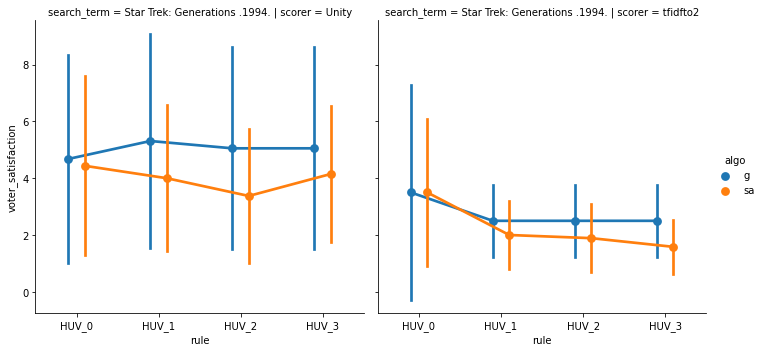

In [10]:
%%time
counts_df = db.query(f"""
select op.order_id, w.search_term, w.algo, w.rule, w.scorer, count(*) as voter_satisfaction
from order_product op inner join winners w on op.product_id = w.product_id
group by w.search_term, w. algo, w.rule, w.scorer, op.order_id
order by scorer, search_term
""")
    
hue='algo'
row='search_term'
col='scorer'
x='rule'

g = sns.catplot(kind='point', data=counts_df, x=x, y='voter_satisfaction', col=col, row=row, hue=hue, ci='sd', dodge=.2, estimator=np.mean, **stylekwargs)

fig_filename = f"{out_folder}/voter_satisfaction.png"
print(f"Saving figure: '{fig_filename}'")
g.savefig(fig_filename)


>>>>>> SCORER = tfidfto2
Saving figure: '../out/manual/movielens-satisfaction/classic/voter_satisfaction_hist_scorer(tfidfto2)_rules(HUV_2,HUV_3).png'
Saving figure: '../out/manual/movielens-satisfaction/classic/voter_satisfaction_hist_scorer(tfidfto2)_rules(HUV_2,HUV_1).png'
Saving figure: '../out/manual/movielens-satisfaction/classic/voter_satisfaction_hist_scorer(tfidfto2)_rules(HUV_0,HUV_1).png'
Saving figure: '../out/manual/movielens-satisfaction/classic/voter_satisfaction_hist_scorer(tfidfto2)_rules(HUV_3,HUV_0).png'


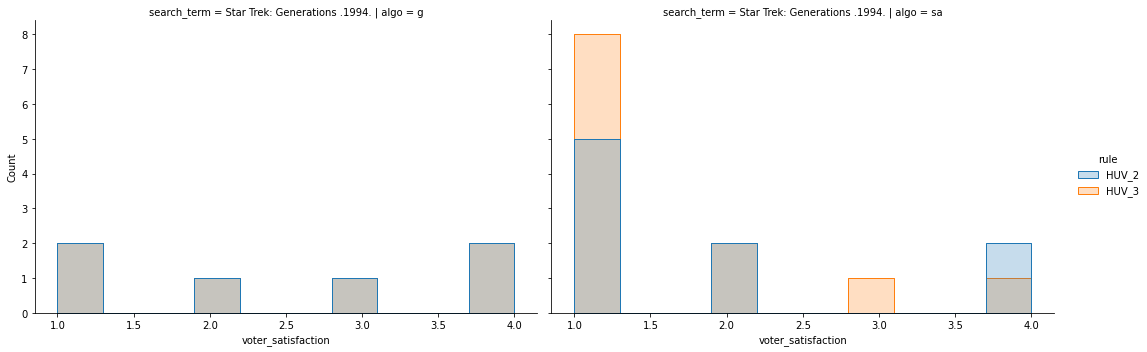

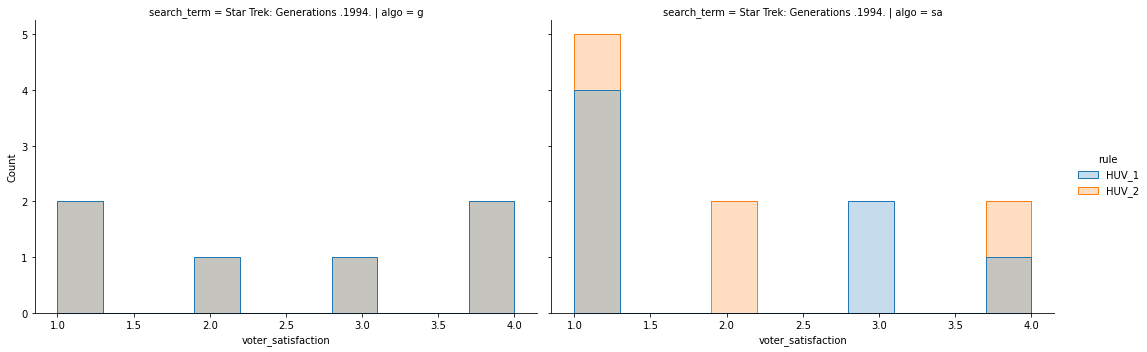

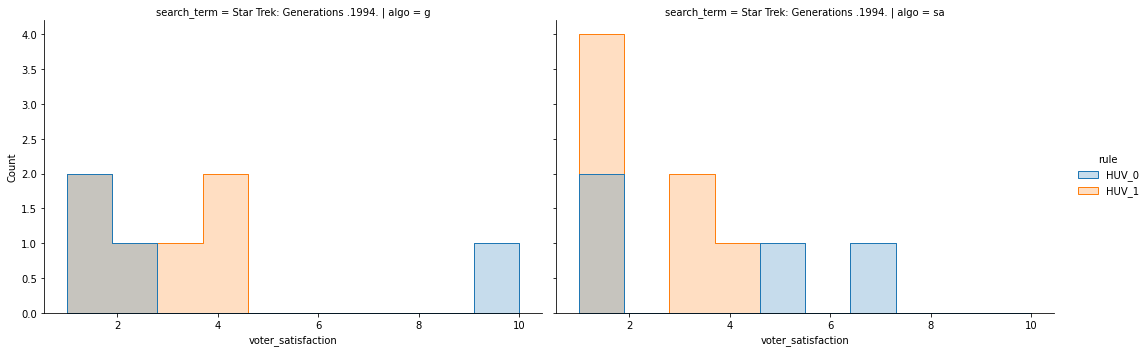

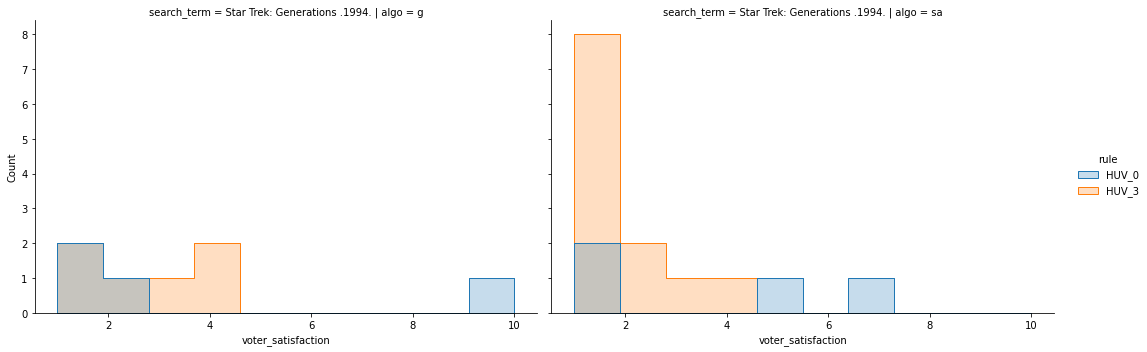

In [15]:
# sns.displot(counts_df, bins=10, x='voter_satisfaction', col='rule', row='algo', hue='scorer', element="step", kde=False, aspect=1.5)
# scorer = 'Unity'
scorer = 'tfidfto2'
print(f">>>>>> SCORER = {scorer}")
for cross_rules in [
    "rule=='HUV_2' or rule=='HUV_3'",
    "rule=='HUV_1' or rule=='HUV_2'",
    "rule=='HUV_0' or rule=='HUV_1'",
    "rule=='HUV_0' or rule=='HUV_3'"
]:
    df = counts_df.query(cross_rules).query(f"scorer=='{scorer}'")
    g = sns.displot(df, 
                bins=10, x='voter_satisfaction', col='algo', row='search_term', hue='rule', 
                element="step", kde=False, aspect=1.5)

    
    
    rules= ",".join(set(df.rule.to_list()))
    fig_filename = f"{out_folder}/voter_satisfaction_hist_scorer({scorer})_rules({rules}).png"
    print(f"Saving figure: '{fig_filename}'")
    g.savefig(fig_filename)
    

## Counting satisfied voters
<!-- The number of satisfied voters (with at least one approved item in the committee) decreases. -->
count of satisfied voters = the count of voters who approve of at least one of the winning movie

#### Unity scorers have a higher count of satisfied voters and a higher average voter satisfaction
The `Agent spread` scorer chooses the most specific movies to the query set (according to the given specificity metric: TFIDF, BM25, etc). This implies that the winners will mostly be the not-so-popular movies (but specific to the query set). 
This is in contrast to the `unity` scorer, which will select the most popular movies within the filtered elections.
This effect means that the agent spread scorers will have less approving voters overall and a lower average voter satisfaction.

#### HUV_x Unity winners have increasing count of satisfied voters (with x increasing)
Unity elections are really approval elections (where all the utilities equal 1), so this behaviour is expected.

#### HUV_x TFIDFto2 winners have DECREASING count of satisfied voters (with x increasing)

- Lemma: When candidates' utilities vary, $HUV_0$ could produce more satisfied voters than $HUV_3$

PROOF SKETCH:
Take the results of utility elections for rules $HUV_0$ and $HUV_3$ with committee size $k=3$, where candidates' utilities are assigned so that $A$ and $C$ are among the winners in both cases and $u(B)=7.5, u(D)=5$ for each of their 'approving' point from the table below (voters' approvals are in rows). 

```
A B C D
. .
. .
.   . .
.   . .
.   . .
      .
```

Then it can be shown that $D \in HUV_0$ and $B \in HUV_3$ causing $HUV_3$ to have less satisfied voters than $HUV_0$.


count of satisfied voters   rule    scorer                    search_term  \
0                         59  HUV_0     Unity  Star Trek: Generations .1994.   
1                         58  HUV_1     Unity  Star Trek: Generations .1994.   
2                         57  HUV_2     Unity  Star Trek: Generations .1994.   
3                         57  HUV_3     Unity  Star Trek: Generations .1994.   
4                          4  HUV_0  tfidfto2  Star Trek: Generations .1994.   
5                          6  HUV_1  tfidfto2  Star Trek: Generations .1994.   
6                          6  HUV_2  tfidfto2  Star Trek: Generations .1994.   
7                          6  HUV_3  tfidfto2  Star Trek: Generations .1994.   

  algo  
0    g  
1    g  
2    g  
3    g  
4    g  
5    g  
6    g  
7    g

Saving figure: '../out/manual/movielens-satisfaction/classic/voter_satisfaction_counts.png'
CPU times: user 522 ms, sys: 59.6 ms, total: 581 ms
Wall time: 345 ms


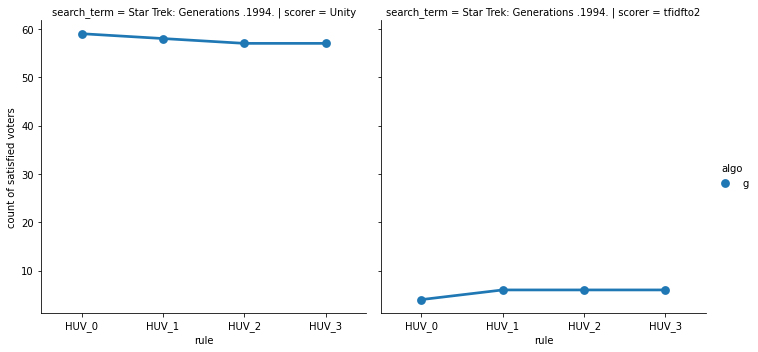

In [12]:
%%time
satisfied_voters_df = db.query(f"""
select count(distinct op.order_id) 'count of satisfied voters', w.rule, w.scorer, w.search_term, w.algo
from order_product op inner join winners w on op.product_id = w.product_id
where algo = 'g'
group by w.search_term, w.rule, w.scorer, w.algo
order by scorer, algo, rule
""")

display(satisfied_voters_df)

g = sns.catplot(data = satisfied_voters_df, kind='point', hue='algo', row='search_term', col='scorer', x='rule', y="count of satisfied voters", ci='sd', dodge=.1, estimator=np.mean, **stylekwargs)

satisfied_voters_df.to_csv(f"{out_folder}/voter_satisfaction_counts.csv", index=False)

fig_filename = f"{out_folder}/voter_satisfaction_counts.png"
print(f"Saving figure: '{fig_filename}'")
g.savefig(fig_filename)

### Utility Satisfaction
voter's utility satisfaction = the maximum utility that a voter achieves from the winners it approves of

rule    scorer                    search_term algo  utility satisfaction
0  HUV_0     Unity  Star Trek: Generations .1994.    g             59.000000
1  HUV_1     Unity  Star Trek: Generations .1994.    g             58.000000
2  HUV_2     Unity  Star Trek: Generations .1994.    g             57.000000
3  HUV_3     Unity  Star Trek: Generations .1994.    g             57.000000
4  HUV_0  tfidfto2  Star Trek: Generations .1994.    g             58.013210
5  HUV_1  tfidfto2  Star Trek: Generations .1994.    g            112.433119
6  HUV_2  tfidfto2  Star Trek: Generations .1994.    g            112.433119
7  HUV_3  tfidfto2  Star Trek: Generations .1994.    g            112.433119

Saving figure: '../out/manual/movielens-satisfaction/classic/utility_satisfaction.png'
CPU times: user 633 ms, sys: 96.5 ms, total: 730 ms
Wall time: 514 ms


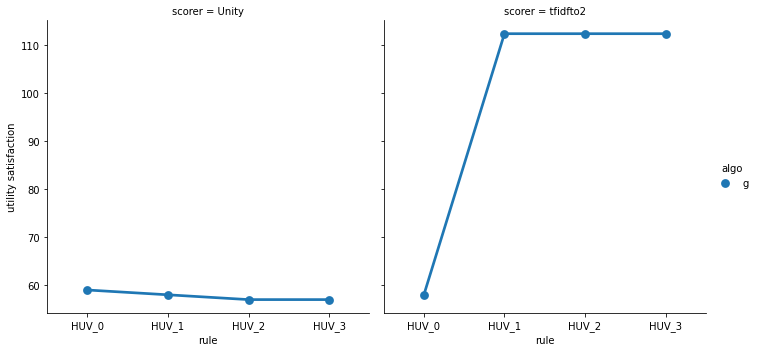

In [13]:
%%time
utility_satisfaction_df = db.query(f"""
select w.rule, w.scorer, w.search_term, w.algo, sum(utility_satisfaction) as 'utility satisfaction'
from (select 
        w.search_term, 
        w.rule, 
        w.scorer, 
        w.algo, 
        CASE scorer WHEN 'Unity' THEN 1 ELSE max(m.tfidfto2/m.count_local) END 'utility_satisfaction'
    from 
        order_product op 
        inner join winners w on op.product_id = w.product_id
        inner join metrics m on op.product_id = m.product_id
    where algo = 'g'
    group by w.search_term, w.rule, w.scorer, w.algo, op.order_id) as w
where algo = 'g'
group by w.search_term, w.rule, w.scorer, w.algo
order by scorer, algo, rule
""")

display(utility_satisfaction_df)

g = sns.catplot(data = utility_satisfaction_df, kind='point', hue='algo', col='scorer', x='rule', y="utility satisfaction", ci='sd', dodge=.1, estimator=np.mean, **stylekwargs)

utility_satisfaction_df.to_csv(f"{out_folder}/utility_satisfaction.csv", index=False)

fig_filename = f"{out_folder}/utility_satisfaction.png"
print(f"Saving figure: '{fig_filename}'")
g.savefig(fig_filename)

In [14]:
winners_df = db.query(f"select * from winners")
winners_df.to_csv(f"{out_folder}/winners.csv", index=False)